# MNIST Handwriten Digit Classification 

This is the main training file of the logistic/softmax classifier on MNIST.

#### Import All Relevant Modules

In [1]:
import os
import time as timer

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

from torchvision import datasets
import torchvision.transforms as T

## My own modules
import viz_utils as vu
import train_utils as tu
import model_utils as mu
###

import imp
imp.reload(mu)
imp.reload(tu)

/var/folders/wb/ttr9x7pn27q1_rp5vtjfr0s00000gn/T/ipykernel_10864/4166587151.py:18: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'train_utils' from '/Users/mghifary/Work/govtech/codes/AI/deeplearning/train_utils.py'>

#### Constants

In [2]:
DATA_DIR = "../data"
MODEL_DIR = "../models"

EPOCHS = 10
BATCH_SIZE = 64
LEARNING_RATE = 1e-3

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

#### Load MNIST dataset

In [3]:
# Load dataset
training_data = datasets.MNIST(
    root=DATA_DIR, 
    train=True, 
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

test_data = datasets.MNIST(
    root=DATA_DIR,
    train=False,
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

In [4]:
# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)

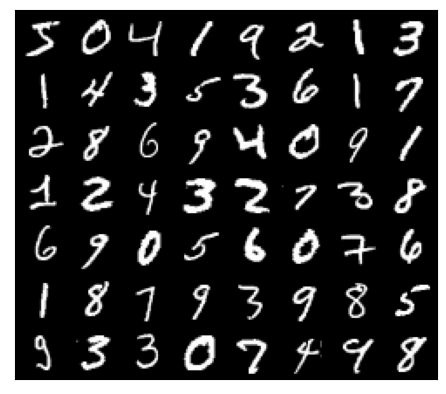

In [5]:
grid = vu.set_grid(train_dataloader.dataset.data, num_cells=56)
vu.show(grid)

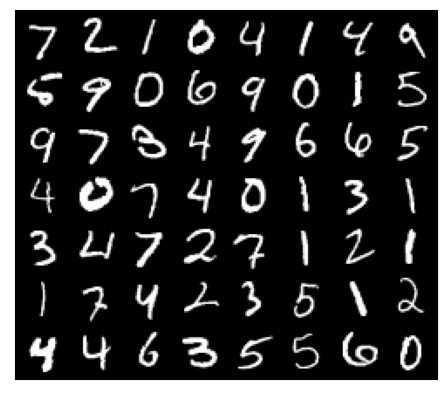

In [6]:
grid = vu.set_grid(test_dataloader.dataset.data, num_cells=56)
vu.show(grid)

#### Create the model

In [7]:
# print(f"Using {DEVICE} device")

# # Define model
# model = mu.SoftmaxClassifier(d_in=28*28, d_out=10).to(DEVICE)
# print(model)

# # Persistent file to store the model
# model_path = os.path.join(MODEL_DIR, "softmax_mnist.pth")

In [8]:
# print(f"Using {DEVICE} device")

# # Define model
# model = mu.MLP(d_in=28*28, d_out=10)
# model = model.to(DEVICE)
# print(model)

# # Persistent file to store the model
# model_path = os.path.join(MODEL_DIR, "mlp_mnist.pth")

In [9]:
print(f"Using {DEVICE} device")

# Define model
model = mu.ConvNet(d_out=10).to(DEVICE)
print(model)

# Persistent file to store the model
model_path = os.path.join(MODEL_DIR, "convnet_mnist_v3.pth")

Using cpu device
ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


#### Define the loss function and the optimizer

In [10]:
loss_fn = nn.CrossEntropyLoss()

# optimizer = optim.SGD(
#     model.parameters(), 
#     lr=LEARNING_RATE
# )

optimizer = optim.Adam(
    model.parameters(), 
    lr=LEARNING_RATE
)

#### Execute the training!

In [11]:
for t in range(EPOCHS):
    print(f"Epoch {t+1} out of {EPOCHS}\n ------------")
    
    start = timer.time()
    tu.train(train_dataloader, model, loss_fn, optimizer)
    elapsed_time = timer.time() - start # this timing method ONLY works for CPU computation, not for GPU/cuda calls
    print(f" > Training time: {elapsed_time:>.2f} seconds")
    
    tu.test(test_dataloader, model, loss_fn)
    
    # Save model
    torch.save(model.state_dict(), model_path)
    print(f"Model {model_path} stored!")
    
print("Done!")

Epoch 1 out of 10
 ------------
Loss: 2.303285 [    0]/60000
Loss: 0.204554 [ 6400]/60000
Loss: 0.144449 [12800]/60000
Loss: 0.268653 [19200]/60000
Loss: 0.079246 [25600]/60000
Loss: 0.047211 [32000]/60000
Loss: 0.103591 [38400]/60000
Loss: 0.086871 [44800]/60000
Loss: 0.094909 [51200]/60000
Loss: 0.080669 [57600]/60000
 > Training time: 44.09 seconds
Test Error: 
 Accuarcy: 97.9%, Avg loss: 0.059903 

Model ../models/convnet_mnist_v3.pth stored!
Epoch 2 out of 10
 ------------
Loss: 0.018664 [    0]/60000
Loss: 0.087866 [ 6400]/60000
Loss: 0.039138 [12800]/60000
Loss: 0.037680 [19200]/60000
Loss: 0.063877 [25600]/60000
Loss: 0.056300 [32000]/60000
Loss: 0.080591 [38400]/60000
Loss: 0.029961 [44800]/60000
Loss: 0.091348 [51200]/60000
Loss: 0.022309 [57600]/60000
 > Training time: 43.96 seconds
Test Error: 
 Accuarcy: 98.5%, Avg loss: 0.046550 

Model ../models/convnet_mnist_v3.pth stored!
Epoch 3 out of 10
 ------------
Loss: 0.004311 [    0]/60000
Loss: 0.061875 [ 6400]/60000
Loss: 0.